# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [53]:
import pandas as pd
import numpy as np

# Part-1


### Linear Regressor with OLS method

In [54]:
class MyLRFromOLS:


  def __init__(self):
      self.m = None
      self.b = None

  def fit(self,X_train,y_train):
    x_mean=np.mean(X_train)
    y_mean=np.mean(y_train)

    # Calculate values of m and b

    a=np.sum(y_train-y_mean)
    c=np.sum(X_train-x_mean)
    self.m = a/c
    self.b =y_mean-(self.m*x_mean)


  def predict(self,X_test):

    return self.m * X_test + self.b

  def get_coeff(self):
    print(f"slope(m): {self.m}")
    print(f"intercept(b): {self.b}")

    # Write code to print the value of m and b

In [55]:
#load dataset
df=pd.read_csv('tvmarketing.csv')
df.sample(5)


,TV,Sales
86,76.3,12.0
54,262.7,20.2
50,199.8,11.4
62,239.3,15.7
199,232.1,13.4


In [56]:
# Separate input and output columns
X = df.TV
y = df.Sales

In [57]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [58]:
olslr = MyLRFromOLS()

In [59]:
olslr.fit(X_train,y_train)

In [60]:
olslr_pred = olslr.predict(X_test)

In [61]:
#View predictions
print(olslr_pred)

112    21.026287
29     -2.374885
182    -5.581135
199    33.584099
193    19.044646
85     24.922771
10     -3.376838
54     40.397380
115    -1.372932
35     46.631755
12    -12.795198
92     30.377849
13      3.614568
126   -16.357698
174    31.424333
2     -14.264729
44    -12.505745
3      15.638005
113    28.574333
14     27.349724
23     32.738005
25     40.441912
6      -5.291682
134    -9.878401
165    34.118474
173    19.400896
45     20.892693
65     -2.731135
48     32.493083
122    31.780583
178    43.514568
64     11.095818
9      26.392302
57     12.231365
78    -16.892073
71      6.353240
128    30.956755
176    37.213396
131    40.954021
53     22.562615
Name: TV, dtype: float64


In [62]:
#Get values of m and b
olslr.get_coeff()

slope(m): 0.22265625
intercept(b): -18.094416503906253


### Linear Regressor with gradient descent


In [63]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
    self.m = np.random.rand() #assign random value
    self.b  = np.random.rand() #assign random value
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X_train,y_train):
      n = len(y_train)
      for i in range(self.epochs):
        y_pred = self.m * X_train + self.b

      # Calculate slope wrt b and m
      loss_slope_b =-(2/n) * np.sum(y_train - y_pred)
      loss_slope_m =-(2/n) * np.sum((y_train - y_pred) * X_train)

      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)


  def predict(self,X_test):
    return self.m * X_test + self.b

  def get_coeff(self):
    return self.m,self.b
    #Write code to get values of m and b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [64]:
#Check with different values of learning_rate and epochs for model convergence
learning_rate=0.001
epochs=100
gdlr = MyLRFromGD(learning_rate, epochs)

In [65]:
gdlr.fit(X_train,y_train)

In [66]:
gdlr_pred = gdlr.predict(X_train)

In [67]:
# View predictions
predictions=gdlr.predict(X_train)

In [68]:
# Get values of m and b
gdlr.get_coeff()

(-46.15413651675451, 0.116423106585888)

In [69]:
# Compare values of m and b obtained from both methods

# Part-2

### R2 Score
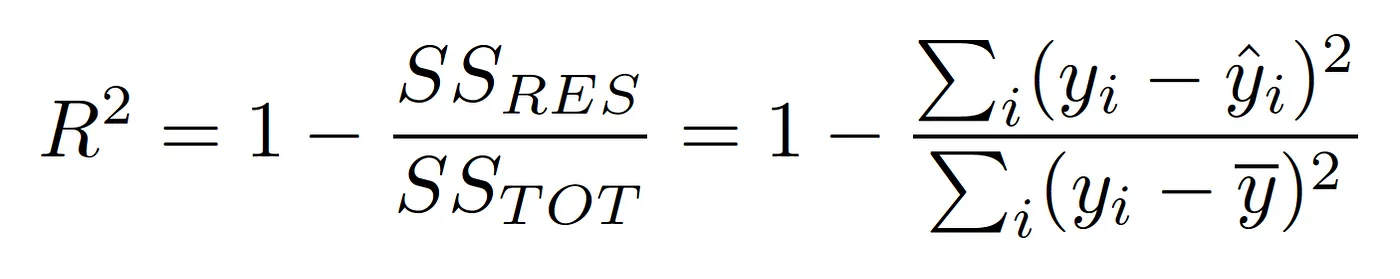

### MEAN ABSOLUTE ERROR
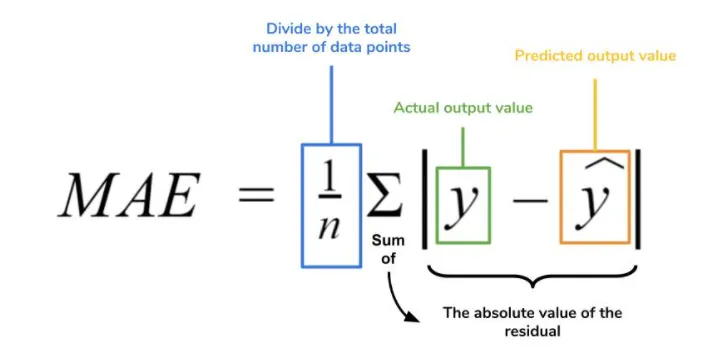

### ROOT MEAN SQUARED ERROR
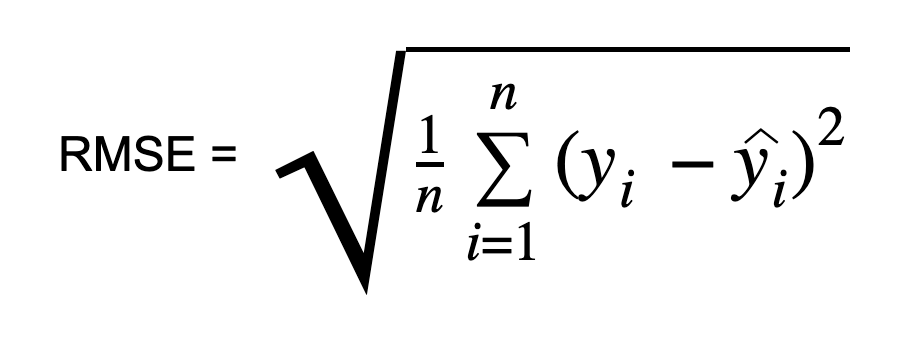

### Evaluation time
Let's see how does both of our models perform.

In [91]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = y_pred
    self.y_test = y_test

  def r2score(self):
    #Write code here
    y_mean=np.mean(self.y_test)
    ss_res = np.sum((self.y_test- self.y_pred) **2)
    ss_tot = np.sum((self.y_test -  y_mean) **2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

  def mae(self):
    #Write code here
    mae = np.mean(np.abs(self.y_test - self.y_pred))
    return mae



  def rmse(self):
    rmse = np.sqrt(np.mean((self.y_test - self.y_pred) ** 2))
    #write code here



In [92]:
# First calculate all the metrics for olslr_pred
eval1=evaluate(olslr_pred,y_test)



In [93]:
 eval1.r2score()

-14.951580850453118

In [94]:
eval1.mae()


15.017316162109376

In [95]:

eval1.rmse()

In [96]:
# Now for gdlr_pred

eval2=evaluate(predictions,y_test)

In [98]:
eval2.r2score()

1.0

In [103]:
eval2.mae()

nan

In [104]:
eval2.rmse()

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!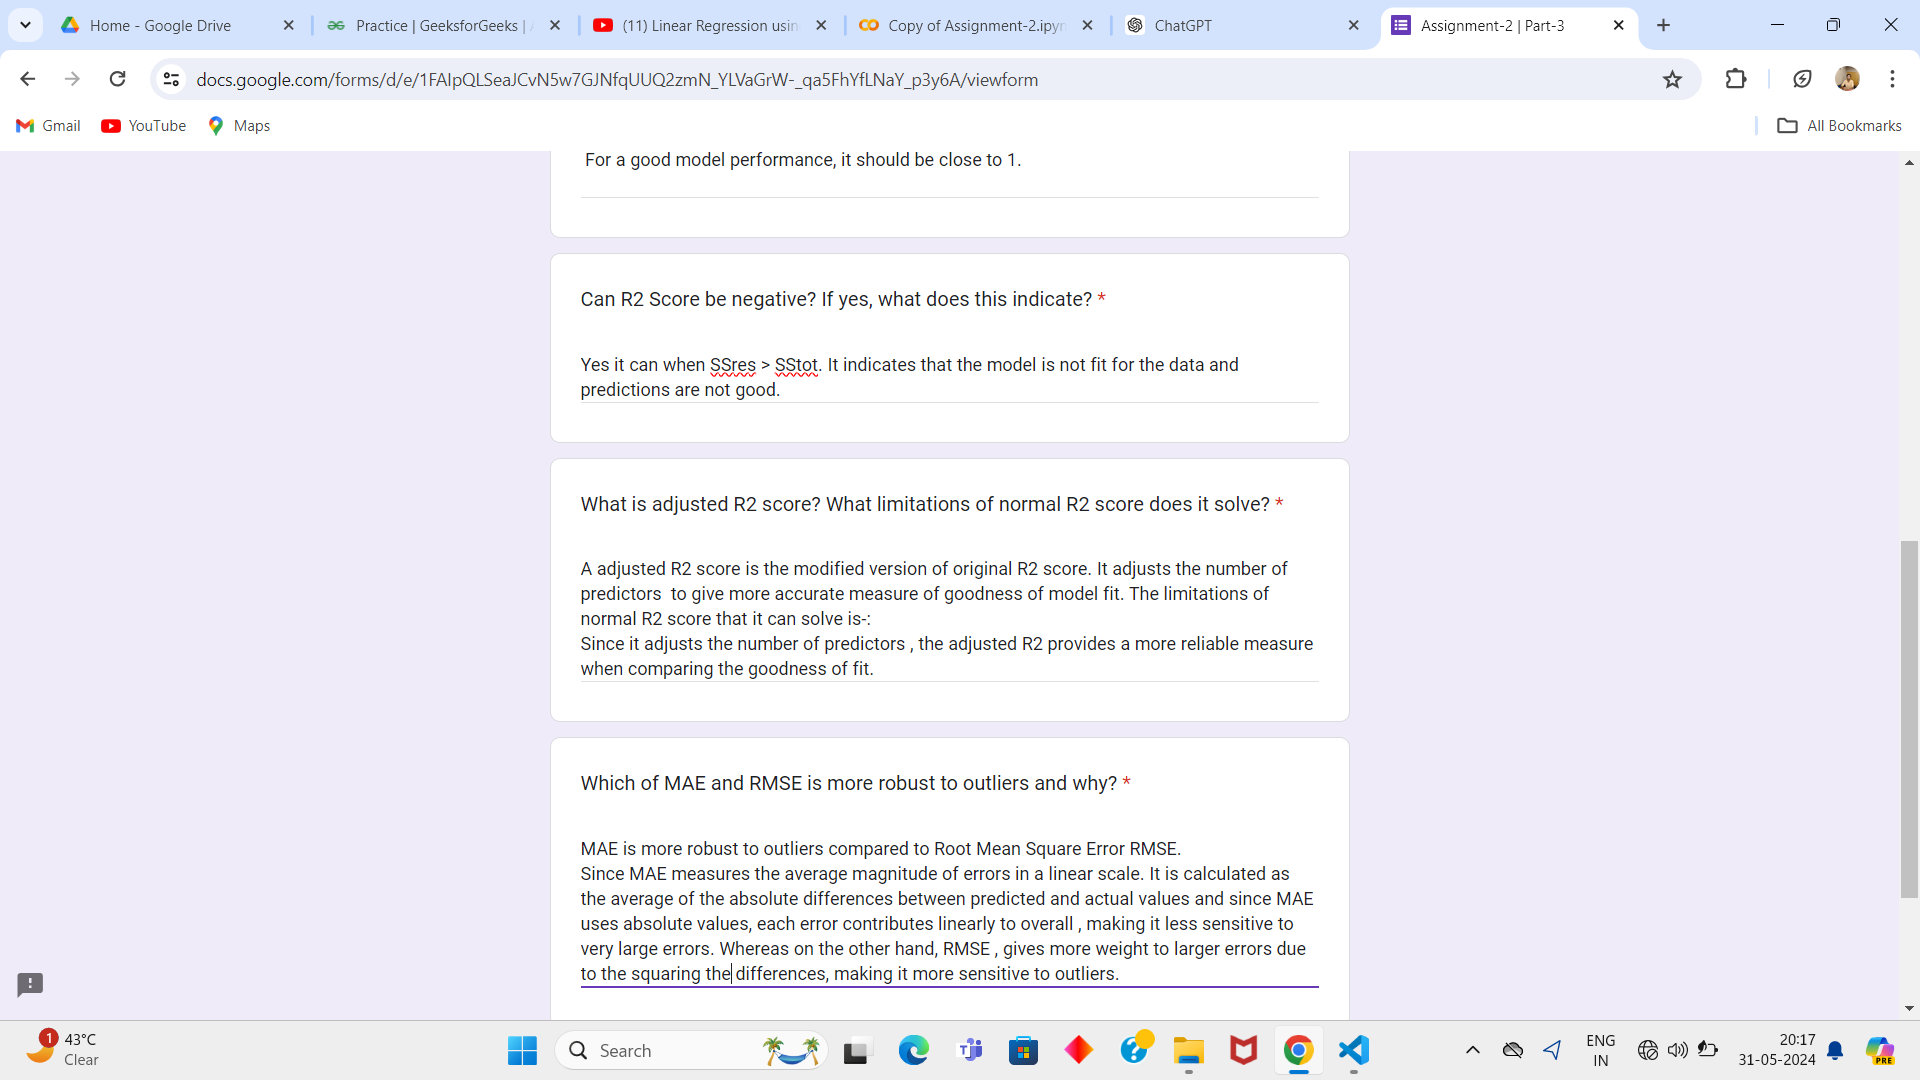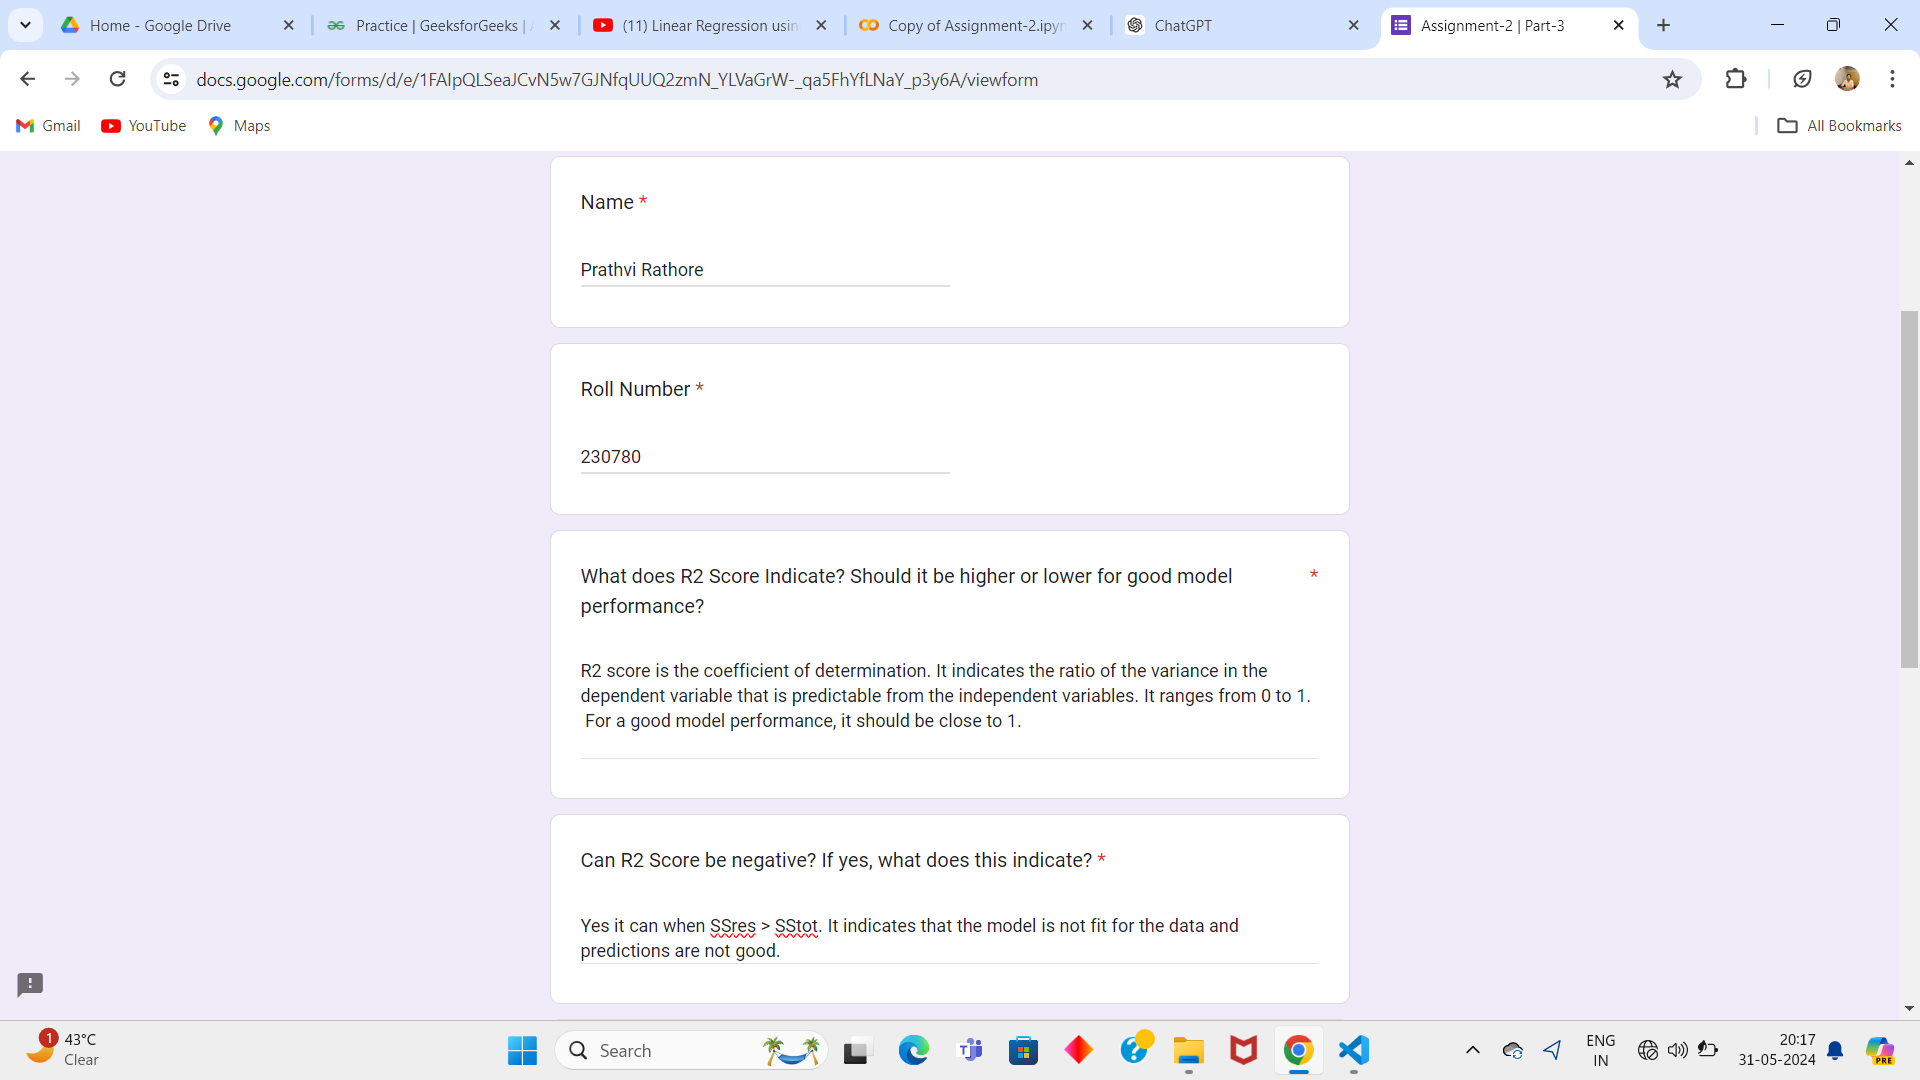

